# Sistemas Estelares - Práctica 04
# Cúmulos Globulares

Descargue del Classroom los datos fotométricos de las estrellas del cúmulo globular NGC 1261 (Kravtsov et al. 2010).
Considere que los valores de las absorciones en las bandas fotométricas presentes en la tabla para ese cúmulo son los
siguientes:

$AU = 0.062~mag$, $AB = 0.052~mag$, $AV = 0.039~mag$, $AI = 0.022~mag$
Estos valores fueron obtenidos de la base de datos (NED).
Utilizando esos datos, haga lo siguiente:

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Para que todas las figuras tengan el mismo tamaño de fuentes es más facil definirlas de manera global
# Además formateo los ticks y el tamaño por defecto de la figura
plt.rcParams['figure.figsize'] = 20,20

plt.rc('font', family='serif', size=16, serif='STIXGeneral') # fuente por defecto
plt.rc('axes', titlesize=22)     # tamaño de fuente título de axe
plt.rc('axes', labelsize=18)     # tamaño de fuente nombre de ejes
plt.rc('xtick', labelsize=16, direction='in')    # tamaño de fuentes ticks
plt.rc('ytick', labelsize=16, direction='in')    # tamaño de fuentes ticks
plt.rc('legend', fontsize=16)    # tamaño de fuentes referencia
plt.rc('figure', titlesize=24)   # tamaño de fuente título de figura
plt.rc('mathtext', fontset='stix')
plt.rc('xtick.minor', visible=True)
plt.rc('ytick.minor', visible=True)
plt.rc('xtick.minor', top=False)
plt.rc('xtick.major', size=10)
plt.rc('xtick.minor', size=5)
plt.rc('ytick.major', size=10)
plt.rc('ytick.minor', size=5)

In [69]:
tabla=pd.read_csv('NGC1261_Kravtsov2010.dat', sep='\s+', comment='#',      
                  names=['xpx','ypx','V','UB','BV','VI','bs'])

tabla = tabla.replace(to_replace=99.99, value=np.nan)
tabla = tabla.replace(to_replace=99.999, value=np.nan)

tabla

,xpx,ypx,V,UB,BV,VI,bs
0,561.3,429.7,11.600,-0.067,0.485,0.549,99
1,1977.5,324.3,11.740,0.529,1.148,1.146,99
2,154.3,149.2,12.415,0.611,1.032,0.998,99
3,790.2,1458.5,13.281,1.478,1.677,1.579,99
4,724.7,245.3,13.540,-0.073,0.599,0.638,99
...,...,...,...,...,...,...,...
5476,711.5,1061.8,22.234,NaN,0.612,NaN,99
5477,797.2,1145.2,22.264,NaN,0.569,NaN,99
5478,1781.5,838.5,22.419,NaN,NaN,0.774,99
5479,1286.1,1019.6,22.495,NaN,0.279,NaN,99


## 1) Seleccione solamente los objetos de la tabla cuya distancia al centro del cúmulo es mayor que 40 segundos de arco. Corrija por extinción los índices de color y las magnitudes de las estrellas dados en la tabla. Luego realice los diagramas color – magnitud: $V_0$ vs. $(B−V)_0$, $I_0$ vs. $(V − I)_0$ y $V_0$ vs. $(B−I)_0$.
Datos adicionales: la escala de las imágenes es $0.417$ segundos de arco por pixel. El centro del cúmulo se
encuentra aproximadamente en las coordenadas $xc = 1075.6$ ; $yc = 1157.8$ pixeles.

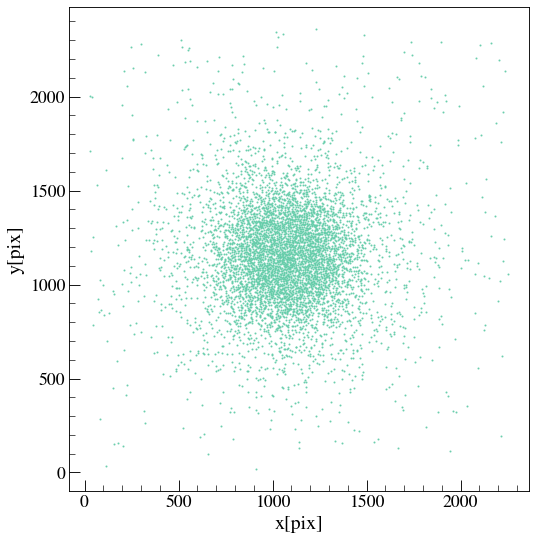

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla['xpx'],tabla['ypx'], marker='o', color='mediumaquamarine',s=0.7, alpha=0.9)

ax.set_aspect('equal', adjustable='box')

ax.set_xlabel('x[pix]')
ax.set_ylabel('y[pix]')
plt.show()

In [71]:
Xc = 1075.6 # px
Yc = 1157.8 # px
px = 0.417  # segundos de arco

# La distancia de un punto al centro deberá estar dada por:
# d = sqrt((x-Xc)^2+(y-Yc)^2) < 40" = 40"/0.417" [pix]

tabla_out = tabla[(np.sqrt((tabla.xpx-Xc)**2+(tabla.ypx-Yc)**2) >= 40/px)]
tabla_out

,xpx,ypx,V,UB,BV,VI,bs
0,561.3,429.7,11.600,-0.067,0.485,0.549,99
1,1977.5,324.3,11.740,0.529,1.148,1.146,99
2,154.3,149.2,12.415,0.611,1.032,0.998,99
3,790.2,1458.5,13.281,1.478,1.677,1.579,99
4,724.7,245.3,13.540,-0.073,0.599,0.638,99
...,...,...,...,...,...,...,...
5476,711.5,1061.8,22.234,NaN,0.612,NaN,99
5477,797.2,1145.2,22.264,NaN,0.569,NaN,99
5478,1781.5,838.5,22.419,NaN,NaN,0.774,99
5479,1286.1,1019.6,22.495,NaN,0.279,NaN,99


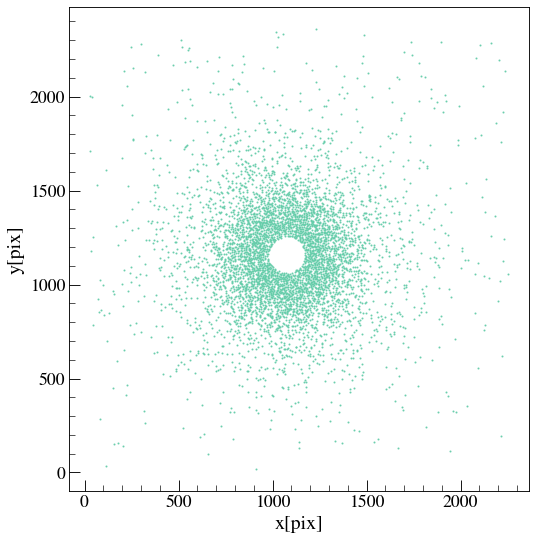

In [72]:
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla_out['xpx'],tabla_out['ypx'], marker='o', s=0.7, color='mediumaquamarine', alpha=0.9)

ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('x[pix]')
ax.set_ylabel('y[pix]')
plt.show()

In [73]:
# Ahora vamos a corregir por extinción los índices de color y las magnitudes en la tabla
# 𝐴𝑈=0.062 𝑚𝑎𝑔, 𝐴𝐵=0.052 𝑚𝑎𝑔, 𝐴𝑉=0.039 𝑚𝑎𝑔,  𝐴𝐼=0.022 𝑚𝑎𝑔
AU = 0.062
AB = 0.052
AV = 0.039
AI = 0.022

E_UB = AU - AB
E_BV = AB - AV
E_VI = AV - AI

tabla_out['V0']  = tabla_out['V'] - AV
tabla_out['I0']  = tabla_out['V'] - tabla_out['VI'] - AI
tabla_out['UB0'] = tabla_out['UB'] - E_UB
tabla_out['BV0'] = tabla_out['BV'] - E_BV
tabla_out['VI0'] = tabla_out['VI'] - E_VI
tabla_out['BI0'] = tabla_out['BV0'] + tabla_out['VI0']

tabla_out

C:\Users\Usuario\anaconda3\envs\AEpracticas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,xpx,ypx,V,UB,BV,VI,bs,V0,I0,UB0,BV0,VI0,BI0
0,561.3,429.7,11.600,-0.067,0.485,0.549,99,11.561,11.029,-0.077,0.472,0.532,1.004
1,1977.5,324.3,11.740,0.529,1.148,1.146,99,11.701,10.572,0.519,1.135,1.129,2.264
2,154.3,149.2,12.415,0.611,1.032,0.998,99,12.376,11.395,0.601,1.019,0.981,2.000
3,790.2,1458.5,13.281,1.478,1.677,1.579,99,13.242,11.680,1.468,1.664,1.562,3.226
4,724.7,245.3,13.540,-0.073,0.599,0.638,99,13.501,12.880,-0.083,0.586,0.621,1.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476,711.5,1061.8,22.234,NaN,0.612,NaN,99,22.195,NaN,NaN,0.599,NaN,NaN
5477,797.2,1145.2,22.264,NaN,0.569,NaN,99,22.225,NaN,NaN,0.556,NaN,NaN
5478,1781.5,838.5,22.419,NaN,NaN,0.774,99,22.380,21.623,NaN,NaN,0.757,NaN
5479,1286.1,1019.6,22.495,NaN,0.279,NaN,99,22.456,NaN,NaN,0.266,NaN,NaN


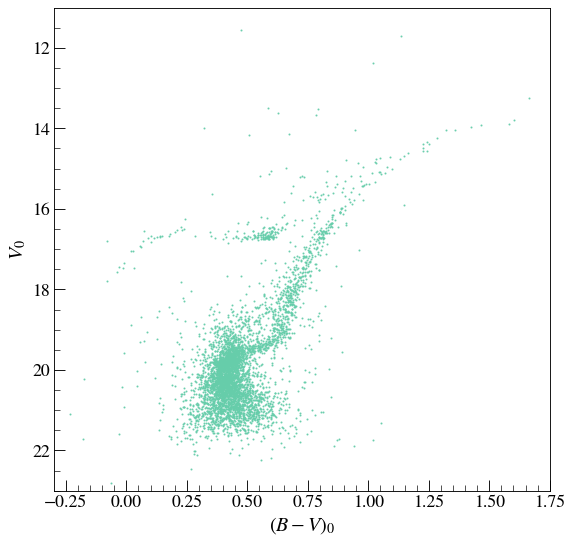

In [ ]:
# V0 vs (B-V)0
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla_out['BV0'],tabla_out['V0'], marker='o', s=0.7, color='mediumaquamarine', alpha=0.9)

plt.gca().invert_yaxis()
ax.set_xlabel('$(B-V)_0$')
ax.set_ylabel('$V_0$')
ax.set_xlim(-0.3,1.75)
ax.set_ylim(23,11)
plt.show()

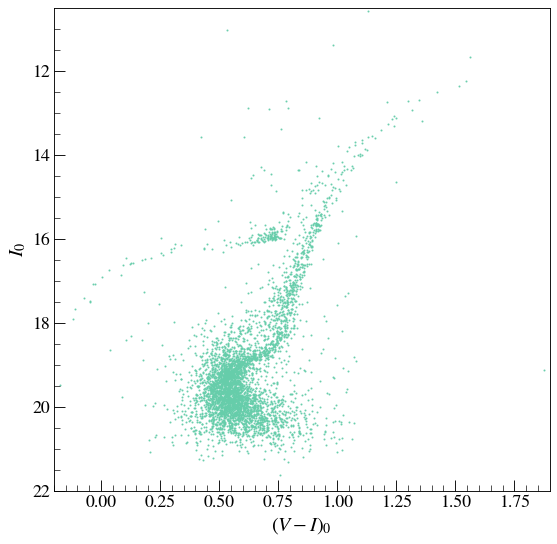

In [ ]:
# I0 vs (V-I)0
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla_out['VI0'],tabla_out['I0'], marker='o', s=0.7, color='mediumaquamarine', alpha=0.9)

plt.gca().invert_yaxis()
ax.set_xlabel('$(V-I)_0$')
ax.set_ylabel('$I_0$')
ax.set_xlim(-0.2,1.9)
ax.set_ylim(22,10.5)
plt.show()

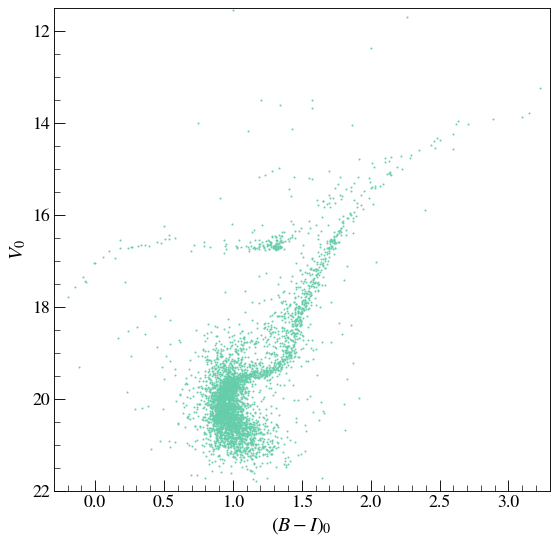

In [ ]:
# V0 vs (B-I)0
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla_out['BI0'],tabla_out['V0'], marker='o', s=0.7, color='mediumaquamarine', alpha=0.9)

plt.gca().invert_yaxis()
ax.set_xlabel('$(B-I)_0$')
ax.set_ylabel('$V_0$')
ax.set_xlim(-0.3,3.3)
ax.set_ylim(22,11.5)
plt.show()

## 2) Describa detalladamente los diagramas, indicando las distintas estructuras, de acuerdo a lo desarrollado en las clases de teoría.

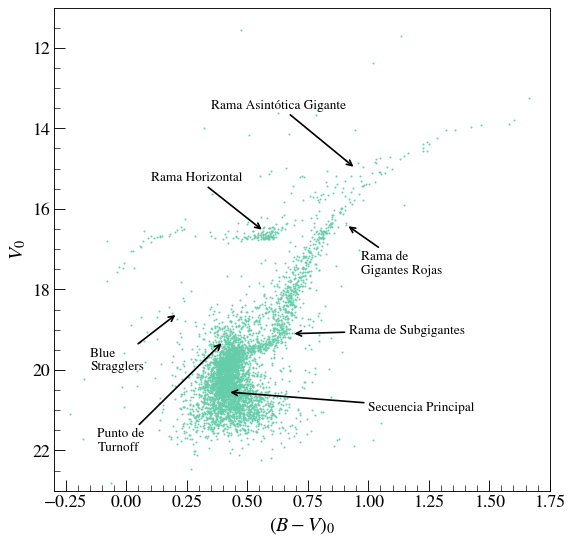

In [ ]:
# V0 vs (B-V)0
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla_out['BV0'],tabla_out['V0'], marker='o', s=0.7, color='mediumaquamarine', alpha=0.9)

#### Texto ##########################################################################################
ax.annotate(text="Secuencia Principal", xy=(0.42, 20.55), xytext=(1, 21), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama de Subgigantes'), xy = (0.685,19.1), xytext = (0.92,19.1), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama de\nGigantes Rojas'), xy = (0.91,16.4), xytext = (0.97,17.6), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Punto de \nTurnoff'), xy = (0.4,19.3), xytext = (-0.12,22), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Blue \nStragglers'), xy = (0.21,18.6), xytext = (-0.15,20), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama Horizontal'), xy = (0.567,16.55), xytext = (0.1,15.3), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama Asintótica Gigante'), xy = (0.946,14.99), xytext = (0.35,13.5), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
#####################################################################################################

plt.gca().invert_yaxis()
ax.set_xlabel('$(B-V)_0$')
ax.set_ylabel('$V_0$')
ax.set_xlim(-0.3,1.75)
ax.set_ylim(23,11)
plt.show()

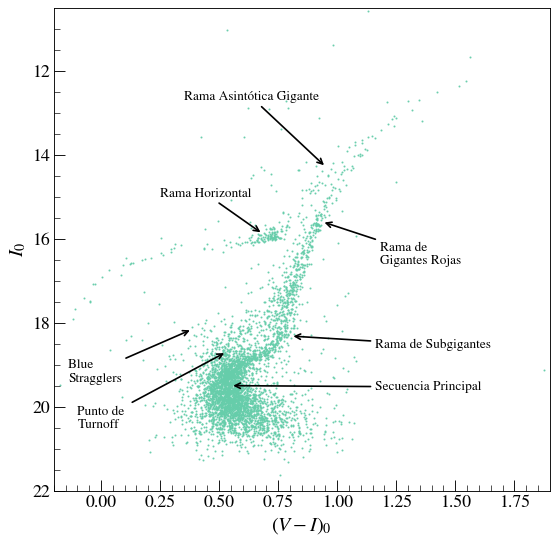

In [ ]:
# I0 vs (V-I)0
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla_out['VI0'],tabla_out['I0'], marker='o', s=0.7, color='mediumaquamarine', alpha=0.9)

#### Texto ##########################################################################################
ax.annotate(text="Secuencia Principal", xy=(0.55,19.5), xytext=(1.16, 19.6), size=12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama de Subgigantes'), xy = (0.805,18.32), xytext = (1.16,18.6), size=12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama de\nGigantes Rojas'), xy = (0.937,15.6), xytext = (1.18,16.6), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))

ax.annotate(str('Punto de \nTurnoff'), xy = (0.53,18.7), xytext = (-0.1,20.5), size=12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Blue \nStragglers'), xy = (0.385,18.16), xytext = (-0.14,19.4), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama Horizontal'), xy = (0.683,15.88), xytext = (0.25,15), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama Asintótica Gigante'), xy = (0.951,14.29), xytext = (0.35,12.7), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
#####################################################################################################

plt.gca().invert_yaxis()
ax.set_xlabel('$(V-I)_0$')
ax.set_ylabel('$I_0$')
ax.set_xlim(-0.2,1.9)
ax.set_ylim(22,10.5)
plt.show()

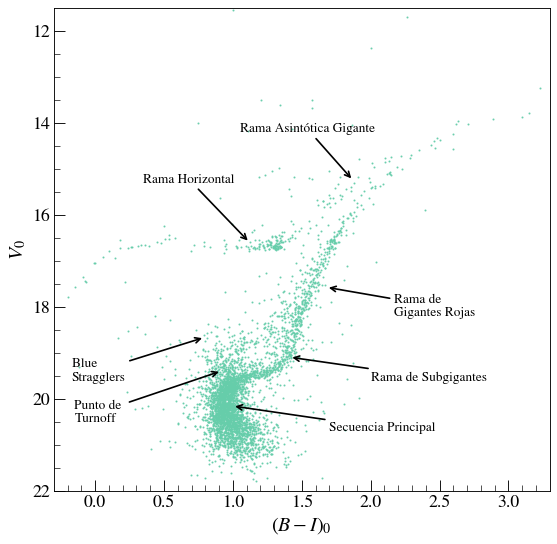

In [ ]:
# V0 vs (B-I)0
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla_out['BI0'],tabla_out['V0'], marker='o', s=0.7, color='mediumaquamarine', alpha=0.9)

#### Texto ##########################################################################################
ax.annotate(text="Secuencia Principal", xy=(1,20.16), xytext=(1.7, 20.7), size=12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama de Subgigantes'), xy = (1.415,19.1), xytext = (2,19.6), size=12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama de\nGigantes Rojas'), xy = (1.68,17.58), xytext = (2.17,18.2), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))

ax.annotate(str('Punto de \nTurnoff'), xy = (0.914,19.4), xytext = (-0.15,20.5), size=12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Blue \nStragglers'), xy = (0.792,18.67), xytext = (-0.17,19.6), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama Horizontal'), xy = (1.119,16.6), xytext = (0.35,15.3), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
ax.annotate(str('Rama Asintótica Gigante'), xy = (1.87,15.25), xytext = (1.05,14.2), size = 12,
            arrowprops=dict(arrowstyle="->", lw=1.5))
#####################################################################################################

plt.gca().invert_yaxis()
ax.set_xlabel('$(B-I)_0$')
ax.set_ylabel('$V_0$')
ax.set_xlim(-0.3,3.3)
ax.set_ylim(22,11.5)
plt.show()

## 3) Estime la metalicidad total [m/H] de NGC 1261 por medio de dos métodos fotométricos diferentes:
#### a) midiendo el índice $∆V_{1.4}$ y aplicando luego la relación: $[m/H] = −0.280(∆V1.4)^2 + 0.717(∆V1.4) − 0.918$

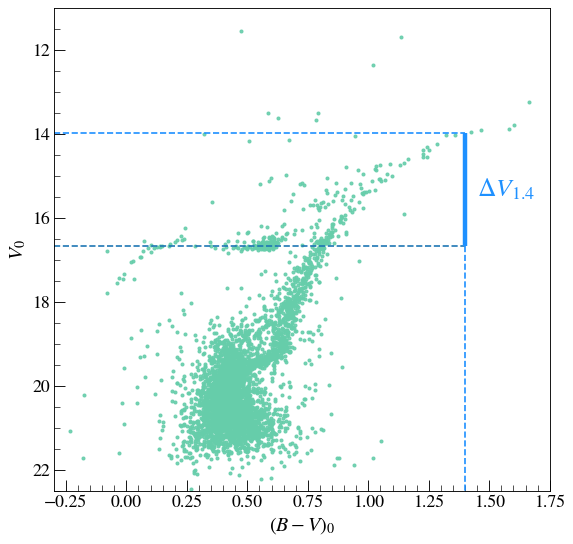

In [80]:
# V0 vs (B-V)0, método deltaV1.4
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), dpi=80)

ax.scatter(tabla_out['BV0'],tabla_out['V0'], marker='o', s=7, color='mediumaquamarine', alpha=0.9)
ax.hlines(16.68, xmin=-0.3, xmax=1.4, linestyles='dashed', lw=1.5)      #Donde está la rama horizontal
ax.vlines(1.4, ymin=13.98, ymax=16.68, lw=4, color='dodgerblue')         # Delta V1.4
ax.hlines(13.98, xmin=-0.3,xmax=1.4,linestyles='dashed',lw=1.5,color='dodgerblue')#Donde (B-V)_0=1.4 intersecta con la rama asintótica
ax.vlines(1.4, ymin=16.68,ymax=23.5,linestyles='dashed',lw=1.5,color='dodgerblue')# Donde está el color intrínseco (B-V)_0=1.4
ax.annotate(text='$\Delta V_{1.4}$', xy=(1.45,15.5), xytext=(1.45,15.5), size = 23, color='dodgerblue')

ax.set_ylim(11,22.5)
ax.set_xlim(-0.3,1.75)
plt.gca().invert_yaxis()
ax.set_xlabel('$(B-V)_0$')
ax.set_ylabel('$V_0$')

plt.show()

In [81]:
# Calculamos la metalicidad total:
# [𝑚/𝐻]=−0.280(∆𝑉1.4)^2+0.717(∆𝑉1.4)−0.918

deltaV = 16.68 - 13.98

mH1 = -0.28*deltaV**2 + 0.717*deltaV - 0.918
print(r'$\Delta V_{1.4}$  = ', deltaV, '\nMetalicidad total =', mH1)

$\Delta V_{1.4}$  =  2.6999999999999993 
Metalicidad total = -1.0232999999999994


#### b) midiendo el índice S2.0 y aplicando luego la relación $[m/H] = −0.29(S2.0) + 0.53$
##### Adopte el promedio de estas dos estimaciones como valor aproximado de la metalicidad total y obtenga el valor correspondiente de la fracción de masa Z, considerando $Z_⊙= 0.0152$. Las relaciones 1) y 2) fueron tomadas de la Tabla 4 de Ferraro et al. (1999).

In [82]:
# En esta celda le estoy haciendo caso a Tomi. Hago un ajuste lineal de los datos que
# se encuentran en la región 0.81 < (B-V)0 < 1.15 y 14.68 < V0 < 16.68
# Pero en la teoría, el profe calculó esta recta a ojo.
pa_ajustar = tabla_out[(0.81<=tabla_out.BV0) & (tabla_out.BV0<=1.15)]
pa_ajustar = pa_ajustar[(14.68<=pa_ajustar.V0) & (pa_ajustar.V0<=16.68)]

Xadj = pa_ajustar['BV0']
Yadj = pa_ajustar['V0']

# Hacemos el ajuste lineal:
from scipy.optimize import curve_fit

def f(x,a,b):
    y = a*x+b
    return y

coefs, cov = curve_fit(f,Xadj,Yadj)

print('Coeficientes:', '\n a=', coefs[0], '\n b=', coefs[1])

fit_x = np.linspace(0.73,1.15,200)
fit_y = f(fit_x,coefs[0],coefs[1])

Coeficientes: 
 a= -5.155537002676157 
 b= 20.494907102276137


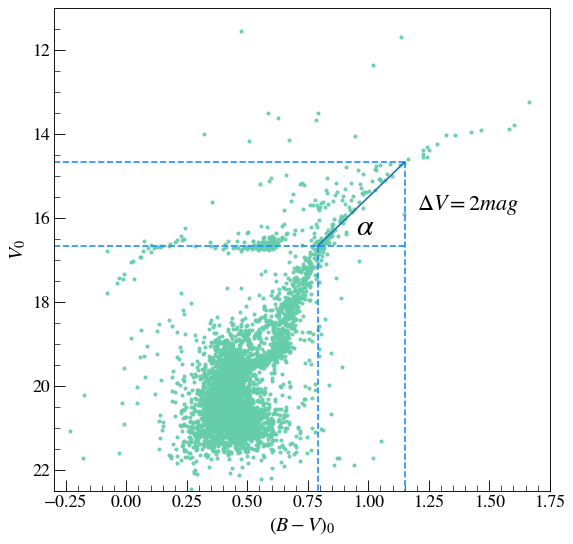

In [83]:
# V0 vs (B-V)0, método S2.0

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8), dpi=80)
ax.scatter(tabla_out['BV0'],tabla_out['V0'], marker='o', s=7, color='mediumaquamarine', alpha=0.9)

#### Recta de la Rama de Gigantes ###########################################################################################
x_gb = np.linspace(0.79,1.15,200)                      # Los coeficientes se sacan viendo en el gráfico dónde toca la GB
y_gb = f(x_gb, 2/(0.79-1.15),14.68-2*1.15/(0.79-1.15)) # las rectas de la rama horizontal y 2mag menos
ax.plot(x_gb,y_gb)
#############################################################################################################################

#ax.plot(fit_x,fit_y) # Agregar esta línea para ver el resultado de la celda anterior

#### Rectas auxiliares ######################################################################################################
ax.hlines(16.68, xmin=-0.3, xmax=1.15, linestyles='dashed', lw=1.5, color='dodgerblue')      #Donde está la rama horizontal
ax.hlines(14.68, xmin=-0.3, xmax=1.15, linestyles='dashed', lw=1.5, color='dodgerblue')      #Donde (B-V)_0=1.4 intersecta con la rama asintótica
ax.vlines(1.15, ymin=14.68, ymax=23.5, linestyles='dashed', lw=1.5, color='dodgerblue')       #
ax.vlines(0.79, ymin=16.68, ymax=23.5, linestyles='dashed', lw=1.5, color='dodgerblue')       #
#############################################################################################################################
ax.annotate(text=r'$\alpha$', xy=(0,16), xytext=(0.95,16.4), size = 27)
ax.annotate(text='$\Delta V=2mag$', xy=(1.45,15.5), xytext=(1.2,15.8), size = 20)


ax.set_ylim(11,22.5)
ax.set_xlim(-0.3,1.75)
plt.gca().invert_yaxis()
ax.set_xlabel('$(B-V)_0$')
ax.set_ylabel('$V_0$')

plt.show()

In [84]:
# Calculamos la metalicidad total nuevamente:
# [𝑚/𝐻]=−0.29(𝑆2.0)+0.53

S20 = 2./(1.15-0.81) # = tg(a)

mH2 = -0.29*S20+0.53
mH = (mH1+mH2)/2.
print('S2.0 = ', S20, '\nMetalicidad total = ', mH2, '\nPromedio entre las metalicidades = ', (mH1+mH2)/2.)

# Con el promedio calculamos la fracción de masa Z: [m/H]=log(Z/Zsun)
Zsun=0.0152
Z = Zsun*np.power(10,(mH1+mH2)/2.)

print('fracción de masa Z = ', Z,'\nRespecto del sol = ', Z/Zsun,'[m/H]Sun')

S2.0 =  5.882352941176473 
Metalicidad total =  -1.175882352941177 
Promedio entre las metalicidades =  -1.0995911764705881
fracción de masa Z =  0.0012085160192109885 
Respecto del sol =  0.07950763284282819 [m/H]Sun


## 4) Estime el módulo de distancia del cúmulo empleando la magnitud V de la rama horizontal V(HB) y la relación:
#### $MV(HB) = 0.15[Fe/H] + 0.80,$
#### donde [Fe/H] se puede obtener mediante la relación aproximada
#### $[Fe/H] = [m/H] − 0.9[α/Fe],$
#### con $[α/Fe] ∼0.28$

In [85]:
#V0HB = 16.68
FeH = mH - 0.9*0.28
MVHB = 0.15*FeH + 0.8

# Ahora calculo el módulo de distancia: m - M = -5 +5logd
d = np.power(10,1+(16.68-MVHB)/5.)

print('m - M =', 16.68-MVHB, '\nd =', d, '[pc]')

m - M = 16.082738676470587 
d = 16464.469248998408 [pc]


## 5) Utilice las isócronas de 6.3, 8.3, 10.3 y 12.3 Giga años (1 Giga año = 109 años) que se encuentran en el Classroom y verifique los valores de Z y $(m− M)_V$ obtenidos. Además, estime la edad del cúmulo. Realice este procedimiento empleando los diagramas V0 vs. (B− V)0 y V0 vs. (B− I)0. 
Las isocronas fueron obtenidas de la base de datos de isocronas y trayectorias evolutivas de Padua (PARSEC) release v1.2S + COLIBRI release PR16, Marigo et al. 2017) disponibles en http://stev.oapd.inaf.it/cgi-bin/cmd.

In [86]:
# Leemos las isocronas, guardamos aparte las de la metalicidad que nos interesa y le calculamos los colores (B-V)_0 y (B-I)_0

GYR63   = pd.read_csv('6_3GYR.dat', sep='\s+', comment='#',      
                  names=['Z', 'log(age/yr)', 'M_ini', 'M_act', 'logL/Lo', 'logTe', 'logG', 'mbol', 'U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', 'Int_IMF', 'stage'])
GYR63['BV0'] = GYR63['B'] - GYR63['V']
GYR63['BI0'] = GYR63['B'] - GYR63['I']
GYR630  = GYR63[(GYR63.Z == 0.0012)]

GYR83   = pd.read_csv('8_3GYR.dat', sep='\s+', comment='#',      
                  names=['Z', 'log(age/yr)', 'M_ini', 'M_act', 'logL/Lo', 'logTe', 'logG', 'mbol', 'U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', 'Int_IMF', 'stage'])
GYR83['BV0'] = GYR83['B'] - GYR83['V']
GYR83['BI0'] = GYR83['B'] - GYR83['I']
GYR830  = GYR83[(GYR83.Z == 0.0012)]

GYR103  = pd.read_csv('10_3GYR.dat', sep='\s+', comment='#',      
                  names=['Z', 'log(age/yr)', 'M_ini', 'M_act', 'logL/Lo', 'logTe', 'logG', 'mbol', 'U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', 'Int_IMF', 'stage'])
GYR103['BV0'] = GYR103['B'] - GYR103['V']
GYR103['BI0'] = GYR103['B'] - GYR103['I']
GYR1030 = GYR103[(GYR103.Z == 0.0012)]

GYR123  = pd.read_csv('12_3GYR.dat', sep='\s+', comment='#',      
                  names=['Z', 'log(age/yr)', 'M_ini', 'M_act', 'logL/Lo', 'logTe', 'logG', 'mbol', 'U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', 'Int_IMF', 'stage'])
GYR123['BV0'] = GYR123['B'] - GYR123['V']
GYR123['BI0'] = GYR123['B'] - GYR123['I']
GYR1230 = GYR123[(GYR123.Z == 0.0012)]

#GYR63

In [87]:
# Agregamos la magnitud absoluta a la tabla del principio, usando el módulo de distancia:
tabla_out['Mv'] = tabla_out['V'] - (16.68-MVHB)

C:\Users\Usuario\anaconda3\envs\AEpracticas\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


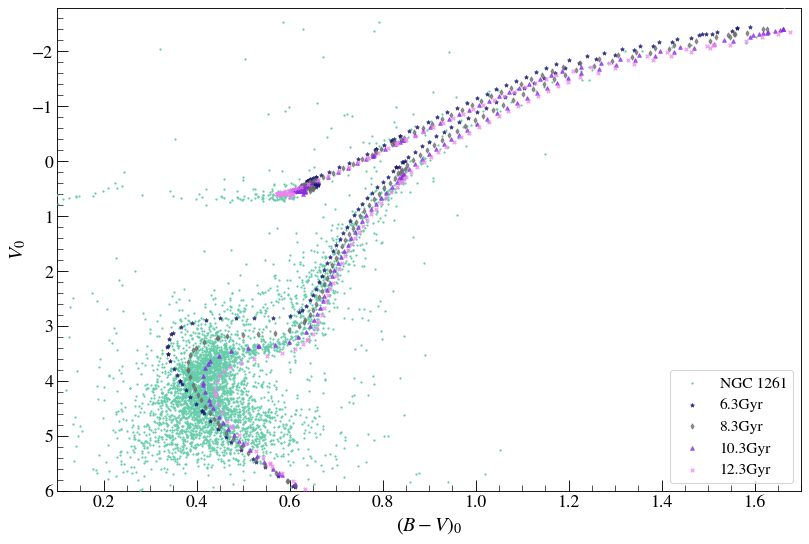

In [164]:
# Graficamos el diagrama Mv vs (B-V)_0 con cada isocrona:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8), dpi=80)

ax.scatter('BV0','Mv', data = tabla_out, color='mediumaquamarine', s=1, zorder=4, label='NGC 1261') # Datos
ax.scatter('BV0','V', data = GYR630, s=10, zorder=5, marker='*', color='midnightblue', label='6.3Gyr', alpha=0.7) # Para modificar el data
ax.scatter('BV0','V', data = GYR830, s=10, zorder=5, marker='d', color='dimgray', label='8.3Gyr', alpha=0.7) # Para modificar el data
ax.scatter('BV0','V', data = GYR1030, s=10, zorder=5, marker='^', color='blueviolet', label='10.3Gyr', alpha=0.7) # Para modificar el data
ax.scatter('BV0','V', data = GYR1230, s=10, zorder=5, marker='x', color='violet', label='12.3Gyr', alpha=0.7) # Para modificar el data


ax.set_xlim(0.1,1.7)
ax.set_ylim(-2.8,6)
plt.gca().invert_yaxis()
ax.set_xlabel('$(B-V)_0$')
ax.set_ylabel('$V_0$')
plt.legend(fontsize=14)

plt.show()

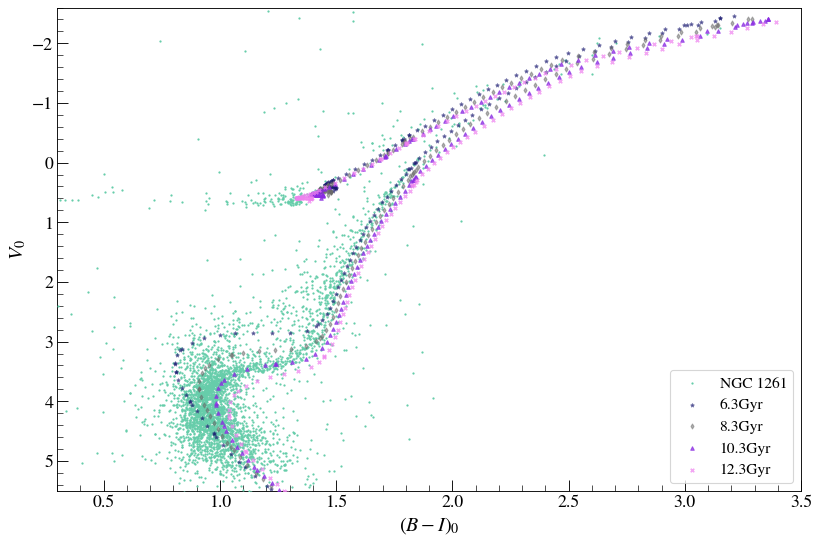

In [ ]:
# Y graficamos el diagrama Mv vs (B-I)_0 con cada isocrona:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8), dpi=80)

ax.scatter('BI0','Mv', data = tabla_out, color='mediumaquamarine',marker='o', s=1, zorder=4, label='NGC 1261') # Datos
ax.scatter('BI0','V', data = GYR630, s=10, zorder=5, marker='*', color='midnightblue', label='6.3Gyr', alpha=0.5) # Para modificar el data
ax.scatter('BI0','V', data = GYR830, s=10, zorder=5, marker='d', color='dimgray', label='8.3Gyr', alpha=0.5) # Para modificar el data
ax.scatter('BI0','V', data = GYR1030, s=10, zorder=5, marker='^', color='blueviolet', label='10.3Gyr', alpha=0.7) # Para modificar el data
ax.scatter('BI0','V', data = GYR1230, s=10, zorder=5, marker='x', color='violet', label='12.3Gyr', alpha=0.7) # Para modificar el data


ax.set_xlim(0.3,3.5)
ax.set_ylim(-2.6,5.5)
plt.gca().invert_yaxis()
ax.set_xlabel('$(B-I)_0$')
ax.set_ylabel('$V_0$')
plt.legend(fontsize=14)

plt.show()

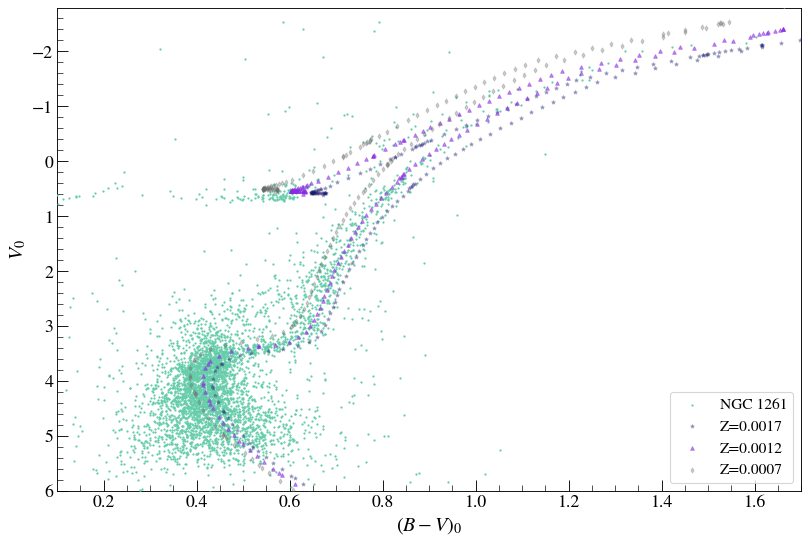

In [165]:
# Me quedo con la isocrona de 10.3Gyr. Qué pasa si varío un poco la metalicidad?

# GYR1030 = GYR103[(GYR103.Z == 0.0012)] Esta va a ser nuestra línea media

Zmas5 = GYR103[(GYR103.Z == 0.0017)]
Zmen5 = GYR103[(GYR103.Z == 0.0007)]

%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8), dpi=80)

ax.scatter('BV0','Mv', data = tabla_out, color='mediumaquamarine', s=1, zorder=4, label='NGC 1261') # Datos
ax.scatter('BV0','V', data = Zmas5, s=10, zorder=5, marker='*', color='midnightblue', label='Z=0.0017', alpha=0.3) # Para modificar el data
ax.scatter('BV0','V', data = GYR1030, s=10, zorder=5, marker='^', color='blueviolet', label='Z=0.0012', alpha=0.5) # Para modificar el data
ax.scatter('BV0','V', data = Zmen5, s=10, zorder=5, marker='d', color='dimgray', label='Z=0.0007', alpha=0.3) # Para modificar el data

ax.set_xlim(0.1,1.7)
ax.set_ylim(-2.8,6)
plt.gca().invert_yaxis()
ax.set_xlabel('$(B-V)_0$')
ax.set_ylabel('$V_0$')
plt.legend(fontsize=14)

plt.show()